In [1]:
from mtdScope import scopeEmulator
import matplotlib.pyplot as plt
import numpy as np
import time
        
#load the sample data to test
se = scopeEmulator()
#se.loadData('./data/HV160_high_300mV_def.hd5')
#se.loadData('./data/HV160_high_300mV_def.hd5')
se.loadData('./data/LaserTest_HV160_low/HV160_high_100mV_def.hd5')
se.sliceEvent()


processing the 0th events...
processing the 500th events...
processing the 1000th events...
processing the 1500th events...
processing the 2000th events...
processing the 2500th events...
processing the 3000th events...
processing the 3500th events...
processing the 4000th events...
processing the 4500th events...
time consumed: 11.114360809326172
trigger time jitter = 16.258907
preAmp time jitter = 36.006298
Walk corrected time jitter = 33.295055


(array([  1.,   1.,   6.,  10.,  19.,  69., 129., 267., 401., 594., 737.,
        852., 708., 537., 359., 192.,  82.,  23.,  10.,   3.]),
 array([42193.765625  , 42207.15820312, 42220.55078125, 42233.94335938,
        42247.3359375 , 42260.72851562, 42274.12109375, 42287.51367188,
        42300.90625   , 42314.29882812, 42327.69140625, 42341.08398438,
        42354.4765625 , 42367.86914062, 42381.26171875, 42394.65429688,
        42408.046875  , 42421.43945312, 42434.83203125, 42448.22460938,
        42461.6171875 ]),
 <a list of 20 Patch objects>)

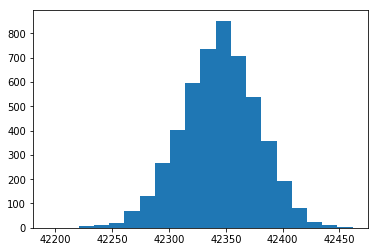

In [3]:
ts = se.runTimeWalk(r0=0, r1= se.nevent, nstep = 500, method = 'newton')
dts = np.subtract(ts[1], ts[0])
print('trigger time jitter = '+str(ts[0].std()))
print('preAmp time jitter = '+str(ts[1].std()))
print('Walk corrected time jitter = '+str(dts.std()))
plt.hist(dts, 20)
